In [1]:
#Import libraries, display plot in the notebook
%matplotlib inline
import pandas as pd

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Read Data files and Explore Contents

In [2]:
titles_path = \
"/home/isaac/Dropbox/Pandas/pycon-pandas-tutorial/data/titles.csv"

cast_path = \
"/home/isaac/Dropbox/Pandas/pycon-pandas-tutorial/data/cast.csv"

release_path = \
"/home/isaac/Dropbox/Pandas/pycon-pandas-tutorial/data/release_dates.csv"

In [3]:
titles = pd.read_csv(titles_path)
cast = pd.read_csv(cast_path)
release = pd.read_csv(release_path)

### 2. Lecture
#### Focus on the index, which is intended to organize the data for faster access

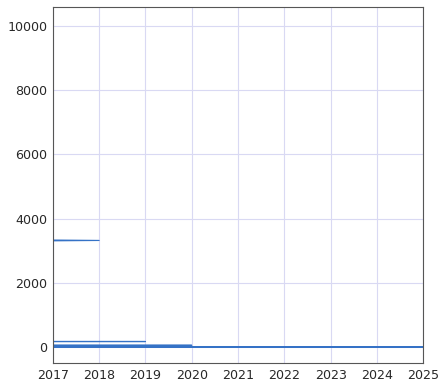

In [4]:
titles.year.value_counts().plot()

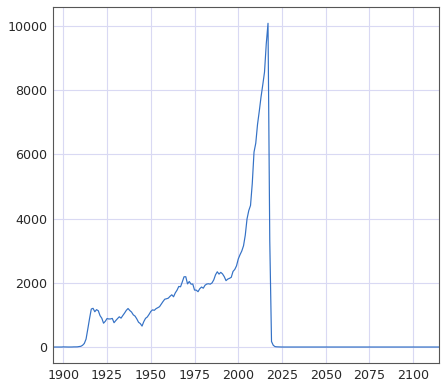

In [5]:
titles.year.value_counts().sort_index().plot()

In [6]:
c = titles
c[c.title == "Hamlet"].head()

,title,year
4158,Hamlet,2017
13646,Hamlet,1990
14175,Hamlet,2011
22555,Hamlet,1948
36991,Hamlet,2000


In [7]:
c = cast
#Get the cast for all the movies named Sleuth
c[c.title == "Sleuth"] #The results are mixed together

,title,year,name,type,character,n
228757,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
288502,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
288503,Sleuth,2007,Michael Caine,actor,Andrew,1.0
330750,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
330751,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1147041,Sleuth,2007,Jude Law,actor,Milo,2.0
1285278,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1299944,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1513570,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1602268,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [8]:
%time
c[c.title == "Sleuth"]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.25 µs


,title,year,name,type,character,n
228757,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
288502,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
288503,Sleuth,2007,Michael Caine,actor,Andrew,1.0
330750,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
330751,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1147041,Sleuth,2007,Jude Law,actor,Milo,2.0
1285278,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1299944,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1513570,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1602268,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [9]:
#set_index, title is the index now
c = cast.set_index(["title"])
c.head()

,year,name,type,character,n
title,,,,,
Suuri illusioni,1985,Homo $,actor,Guests,22.0
Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [10]:
%time
c.loc["Sleuth"]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.48 µs


,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
Sleuth,2007,Michael Caine,actor,Andrew,1.0
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,2007,Jude Law,actor,Milo,2.0
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0


#### Index is really helpful once the data is ordered

In [11]:
%time
c.sort_index()
c.loc["Sleuth"]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.58 µs


,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
Sleuth,2007,Michael Caine,actor,Andrew,1.0
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,2007,Jude Law,actor,Milo,2.0
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0


#### set_index can have multiple columns

In [12]:
c = cast.set_index(["title", "year"]).sort_index()

In [13]:
%time
c.loc["Hamlet"].loc[2015]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


,name,type,character,n
year,,,,
2015,Thomas (II) Arnold,actor,Horatio,5.0
2015,John Shrapnel,actor,Claudius,2.0
2015,John Shrapnel,actor,Ghost,2.0
2015,Gillian Bevan,actress,Polonia,4.0
2015,Barbara Marten,actress,Gertrude,3.0
2015,Maxine Peake,actress,Hamlet,1.0


In [14]:
c.loc[("Hamlet", 1910)]

,,name,type,character,n
title,year,,,,
Hamlet,1910,Jean Mounet-Sully,actor,Hamlet,NaN


In [15]:
# Go backwards reset all
c.reset_index().head()

,title,year,name,type,character,n
0,#1 Serial Killer,2013,Michael Alton,actor,Detective Roberts,17.0
1,#1 Serial Killer,2013,Aaron Aoki,actor,Plastic Bag Victim,21.0
2,#1 Serial Killer,2013,Zachary (X) Brown,actor,Africian American Teen,18.0
3,#1 Serial Killer,2013,Yvis Cannavale,actor,Homeless Man,25.0
4,#1 Serial Killer,2013,Patrick Chien,actor,Cleaver Victim,22.0


In [16]:
c.reset_index("year").head()

,year,name,type,character,n
title,,,,,
#1 Serial Killer,2013,Michael Alton,actor,Detective Roberts,17.0
#1 Serial Killer,2013,Aaron Aoki,actor,Plastic Bag Victim,21.0
#1 Serial Killer,2013,Zachary (X) Brown,actor,Africian American Teen,18.0
#1 Serial Killer,2013,Yvis Cannavale,actor,Homeless Man,25.0
#1 Serial Killer,2013,Patrick Chien,actor,Cleaver Victim,22.0


#### Groupby

In [17]:
c = cast
c = c[c.name == "George Clooney"]
c.groupby(["title", "year", "character"]).size()

title                              year  character               
A Very Murray Christmas            2015  Himself                     1
Batman & Robin                     1997  Batman                      1
                                         Bruce Wayne                 1
Burn After Reading                 2008  Harry Pfarrer               1
Confessions of a Dangerous Mind    2002  Jim Byrd                    1
Curdled                            1996  Seth Gecko                  1
Fantastic Mr. Fox                  2009  Mr. Fox                     1
From Dusk Till Dawn                1996  Seth Gecko                  1
Good Night, and Good Luck.         2005  Fred Friendly               1
Gravity                            2013  Matt Kowalski               1
Hail, Caesar!                      2016  Baird Whitlock              1
Intolerable Cruelty                2003  Miles                       1
Leatherheads                       2008  Dodge Connelly              1
Michael Cla

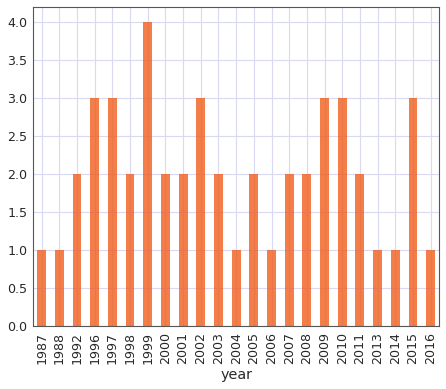

In [18]:
c.groupby("year").size().plot(kind = "bar", color = "#F05E1C", alpha = 0.8)

In [19]:
#How many roles are there for each year
c.groupby("year").size()

year
1987    1
1988    1
1992    2
1996    3
1997    3
1998    2
1999    4
2000    2
2001    2
2002    3
2003    2
2004    1
2005    2
2006    1
2007    2
2008    2
2009    3
2010    3
2011    2
2013    1
2014    1
2015    3
2016    1
dtype: int64

In [20]:
#What's the max n by each year
c.groupby("year").n.max()

year
1987    15.0
1988     2.0
1992    23.0
1996     2.0
1997     2.0
1998    14.0
1999    11.0
2000     1.0
2001    36.0
2002    17.0
2003    22.0
2004     3.0
2005    15.0
2006     1.0
2007     6.0
2008     5.0
2009     1.0
2010     1.0
2011     2.0
2013     2.0
2014     1.0
2015     2.0
2016     NaN
Name: n, dtype: float64

In [21]:
#What's the mean n by each year
c.groupby("year").n.mean()

year
1987    15.000000
1988     2.000000
1992    14.000000
1996     1.500000
1997     1.666667
1998     7.500000
1999     6.000000
2000     1.000000
2001    18.500000
2002    11.000000
2003    11.500000
2004     3.000000
2005     8.500000
2006     1.000000
2007     3.500000
2008     3.000000
2009     1.000000
2010     1.000000
2011     1.500000
2013     2.000000
2014     1.000000
2015     1.500000
2016          NaN
Name: n, dtype: float64

In [22]:
#Don't have to group by based on a known column
c.groupby(c.year // 10 * 10).n.size()
#1:30:47

year
1980     2
1990    14
2000    20
2010    11
Name: n, dtype: int64

### 3. Drill 3

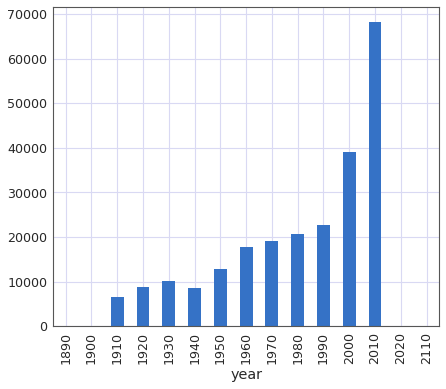

In [23]:
### Using groupby(), plot the number of films that have been released each decade in the history of cinema.
t = titles
t.groupby(t.year // 10 * 10).size().sort_index().plot(kind="bar")

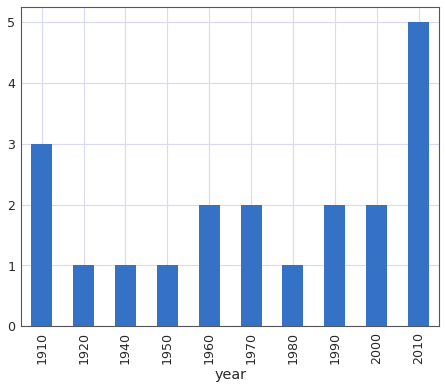

In [24]:
### Use groupby() to plot the number of "Hamlet" films made each decade.
t = titles
t[t.title == "Hamlet"].groupby(t.year // 10 * 10).size().plot(kind = "bar")

In [25]:
### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?
c = cast
c[(c.year // 10 * 10 == 1950) & (c.n == 1)].groupby(["year", "type"]).size()

year  type   
1950  actor      604
      actress    270
1951  actor      632
      actress    272
1952  actor      591
      actress    286
1953  actor      631
      actress    290
1954  actor      623
      actress    298
1955  actor      606
      actress    264
1956  actor      611
      actress    288
1957  actor      707
      actress    283
1958  actor      692
      actress    275
1959  actor      678
      actress    287
dtype: int64

In [26]:
### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?
c = cast
c = c[c.n <= 5]
c = c[c.year // 10 * 10 == 1950]
c.groupby(["n", "type"]).size()

n    type   
1.0  actor      6375
     actress    2813
2.0  actor      4377
     actress    4399
3.0  actor      5404
     actress    3015
4.0  actor      5400
     actress    2742
5.0  actor      5428
     actress    2443
dtype: int64

In [27]:
### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.
### max n means the number of roles
c = cast
c = c[c.title == "The Pink Panther"]
c.groupby("year").n.max()

year
1963    15.0
2006    50.0
Name: n, dtype: float64

In [28]:
### List, in order by year, each of the films in which Frank Oz has played more than 1 role.
c = cast
c = c[c.name == "Frank Oz"]
c = c.set_index(["year", "title"])
c.loc[c.groupby(["year","title"]).character.size() > 1]

name   type  \
year title                                                       
1981 An American Werewolf in London            Frank Oz  actor   
     An American Werewolf in London            Frank Oz  actor   
1996 Muppet Treasure Island                    Frank Oz  actor   
     Muppet Treasure Island                    Frank Oz  actor   
     Muppet Treasure Island                    Frank Oz  actor   
     Muppet Treasure Island                    Frank Oz  actor   
1999 Muppets from Space                        Frank Oz  actor   
     Muppets from Space                        Frank Oz  actor   
     Muppets from Space                        Frank Oz  actor   
     Muppets from Space                        Frank Oz  actor   
1985 Sesame Street Presents: Follow that Bird  Frank Oz  actor   
     Sesame Street Presents: Follow that Bird  Frank Oz  actor   
     Sesame Street Presents: Follow that Bird  Frank Oz  actor   
1999 The Adventures of Elmo in Grouchland      Frank Oz  actor   
     The Adventures of Elmo in Grouchland      Frank Oz  actor   
     The Adventures of Elmo in Grouchland      Frank Oz  actor   
1982 The Dark Crystal                          Frank Oz  actor   
     The Dark Crystal                          Frank Oz  actor   
1981 The Great Muppet Caper                    Frank Oz  actor   
     The Great Muppet Caper                    Frank Oz  actor   
     The Great Muppet Caper                    Frank Oz  actor   
     The Great Muppet Caper                    Frank Oz  actor   
     The Great Muppet Caper                    Frank Oz  actor   
     The Great Muppet Caper                    Frank Oz  actor   
1992 The Muppet Christmas Carol                Frank Oz  actor   
     The Muppet Christmas Carol                Frank Oz  actor   
     The Muppet Christmas Carol                Frank Oz  actor   
     The Muppet Christmas Carol                Frank Oz  actor   
     The Muppet Christmas Carol                Frank Oz  actor   
     The Muppet Christmas Carol                Frank Oz  actor   
     The Muppet Christmas Carol                Frank Oz  actor   
1979 The Muppet Movie                          Frank Oz  actor   
     The Muppet Movie                          Frank Oz  actor   
     The Muppet Movie                          Frank Oz  actor   
     The Muppet Movie                          Frank Oz  actor   
     The Muppet Movie                          Frank Oz  actor   
     The Muppet Movie                          Frank Oz  actor   
     The Muppet Movie                          Frank Oz  actor   
     The Muppet Movie                          Frank Oz  actor   
1984 The Muppets Take Manhattan                Frank Oz  actor   
     The Muppets Take Manhattan                Frank Oz  actor   
     The Muppets Take Manhattan                Frank Oz  actor   
     The Muppets Take Manhattan                Frank Oz  actor   
     The Muppets Take Manhattan                Frank Oz  actor   
     The Muppets Take Manhattan                Frank Oz  actor   
     The Muppets Take Manhattan                Frank Oz  actor   

                                                                                       character  \
year title                                                                                         
1981 An American Werewolf in London                                                  Mr. Collins   
     An American Werewolf in London                                                   Miss Piggy   
1996 Muppet Treasure Island                                                           Miss Piggy   
     Muppet Treasure Island                                                          Fozzie Bear   
     Muppet Treasure Island                                                        Sam the Eagle   
     Muppet Treasure Island                                                               Animal   
1999 Muppets from Space                                                           

In [29]:
#Alternatively
g = c.groupby(["year","title"]).character.size()
g[g >1 ]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
Name: character, dtype: int64

In [30]:
### List each of the characters that Frank Oz has portrayed at least twice.
c = cast
c = c[c.name == "Frank Oz"]
g = c.groupby("character").size()
g[g>=2]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              5
dtype: int64

### 4. Lectures
#### Stack and Unstack

In [31]:
c = cast
uc = c.groupby([c.year // 10 * 10, "type"]).size().unstack()
#But this is not optimal to calculate the differences
uc

type,actor,actress
year,,
1890,8,1
1900,54,16
1910,26575,15224
1920,46744,23073
1930,147642,48223
1940,156604,49744
1950,147951,53969
1960,120889,52327
1970,138378,60467


In [32]:
#Stack is the solution here
c = cast
c = c[(c.character == "Kermit the Frog") | (c.character == "Oscar the Grouch")]
c = c.groupby(["character", c.year // 10 * 10]).size()
c.unstack()

year,1970,1980,1990,2000,2010
character,,,,,
Kermit the Frog,1.0,4.0,2.0,1.0,1.0
Oscar the Grouch,NaN,1.0,1.0,1.0,NaN


In [33]:
c.unstack(0)

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,NaN
1980,4.0,1.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,NaN


In [34]:
##Equivalent to
c.unstack().transpose()

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,NaN
1980,4.0,1.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,NaN


In [35]:
u = c.unstack(0)
u["diff"] = u["Kermit the Frog"] - u["Oscar the Grouch"]
u
#NaN is filled if the data doesn't exist

character,Kermit the Frog,Oscar the Grouch,diff
year,,,
1970,1.0,NaN,NaN
1980,4.0,1.0,3.0
1990,2.0,1.0,1.0
2000,1.0,1.0,0.0
2010,1.0,NaN,NaN


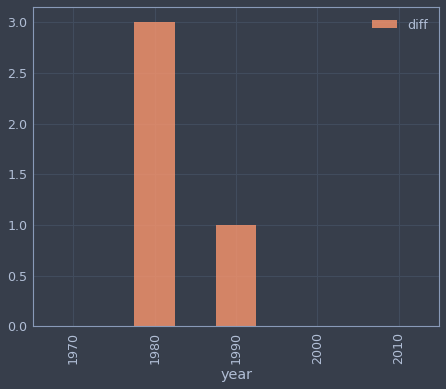

In [36]:
jtplot.style('onedork')
u.plot(x=u.index, y="diff", kind="bar", color = "#FB966E", alpha = 0.8)

In [37]:
#Fill na as empty
u.fillna("")

character,Kermit the Frog,Oscar the Grouch,diff
year,,,
1970,1.0,,
1980,4.0,1,3
1990,2.0,1,1
2000,1.0,1,0
2010,1.0,,


In [38]:
c = cast
c = c[(c.character == "Kermit the Frog") | (c.character == "Oscar the Grouch")]
c = c.groupby(["character", c.year // 10 * 10]).size()
c

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    1
                  1990    1
                  2000    1
dtype: int64

In [39]:
#use unstack twice on this dataframe will reset back to the Series
#By default, df has two indices
g = c.unstack("character")
g = g.reset_index()

In [40]:
g["extra"] = 1
g = g.set_index("extra", drop="True")
g

character,year,Kermit the Frog,Oscar the Grouch
extra,,,
1,1970,1.0,NaN
1,1980,4.0,1.0
1,1990,2.0,1.0
1,2000,1.0,1.0
1,2010,1.0,NaN


### 5.Drills 4

In [41]:
### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?
c = cast
c = c[(c.character == "Superman") | (c.character == "Batman")]
g = c.groupby(["year", "character"]).size()
u = g.unstack("character")
u = u.fillna(0)
len(u[u.Superman > u.Batman])

12

In [42]:
### How many years have been "Batman years", with more Batman characters than Superman characters?
c = cast
c = c[(c.character == "Superman") | (c.character == "Batman")]
g = c.groupby(["year", "character"]).size()
u = g.unstack("character")
u = u.fillna(0)
len(u[u.Batman > u.Superman])

24

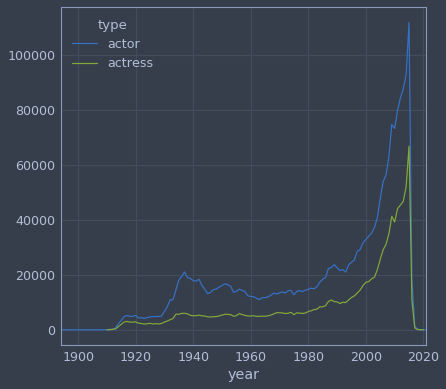

In [43]:
### Plot the number of actor roles each year and the number of actress roles each year over the history of film.
c = cast
c = c.groupby(["year","type"]).size()
u = c.unstack()
u.plot(x=u.index, y =["actor","actress"])

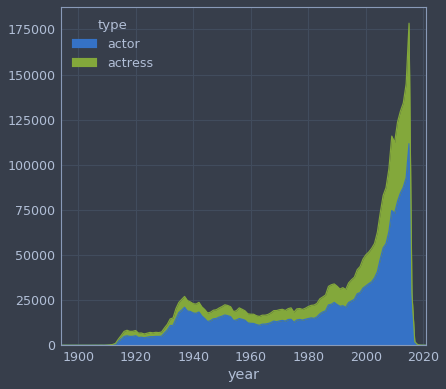

In [44]:
### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.
c = cast
c = c.groupby(["year", "type"]).size()
u = c.unstack()
u.plot(x=u.index, y = ["actor", "actress"], kind = "area")

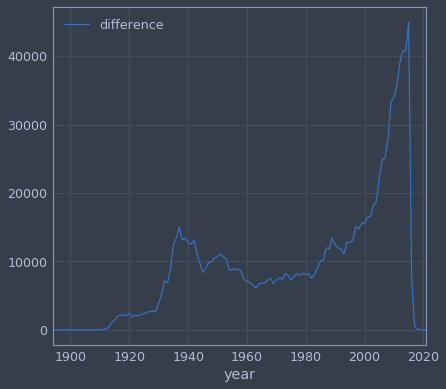

In [45]:
### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.
c = cast
c = c.groupby(["year", "type"]).size()
u = c.unstack()
u = u.fillna(0)
u["difference"] = u.actor - u.actress
u.plot(x = u.index, y = "difference")

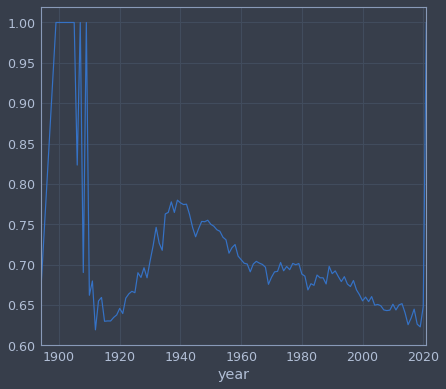

In [46]:
### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.
c = cast
c = c.groupby(["year", "type"]).size()
u = c.unstack()
u = u.fillna(0)
u["actor_ratio"] = u.actor / (u.actor + u.actress)
u.actor_ratio.plot()

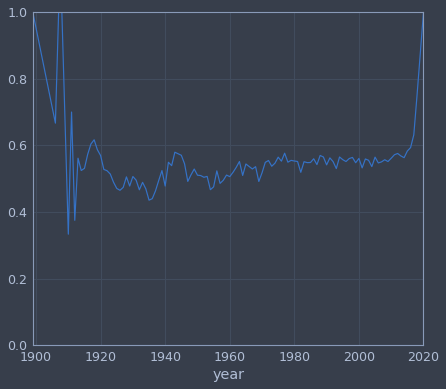

In [47]:
### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.
c = cast
c = c[c.n == 2]
c = c.groupby(["year", "type"]).size()
c = c.unstack("type")
c = c.fillna(0)
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

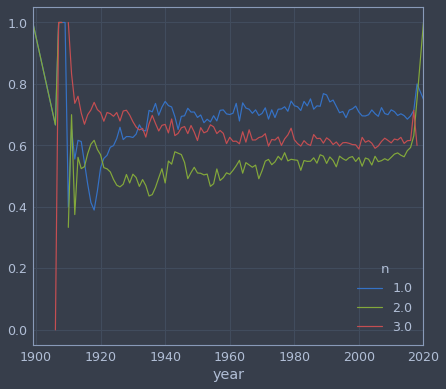

In [48]:
### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film
c = cast
c = c[c.n <= 3]
c = c.groupby(["year", "type", "n"]).size()
c = c.unstack("type")
c = c.fillna(0)
r = c.actor / (c.actor + c.actress)
r = r.unstack("n")
r.plot()